<a href="https://colab.research.google.com/github/AmaniM05/AmaniM05/blob/main/TenderBids_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TenderData.csv to TenderData.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['TenderData.csv']))

<ipython-input-3-fe26e54b2368>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['TenderData.csv']))


In [5]:
df_canada = df[df['country_of_vendor_en'] == 'Canada']

In [6]:
categories = {
    'Maintenance': ['Maintenance', 'Repair', 'Janitorial', 'Cleaning'],
    'IT': ['Computer', 'Software', 'Networking', 'IT', 'License', 'Maintenance fees'],
    'Website Design': ['Website', 'Web Design', 'Web Development'],
    'Construction': ['Construction', 'Building', 'Laboratories', 'Electrical', 'Plumbing'],
    'Scientific Services': ['Scientific', 'Research', 'Environmental Study'],
    'Consulting': ['Consulting', 'Management', 'Professional Services'],
    'Goods': ['Goods', 'Equipment', 'Furniture', 'Vehicles', 'Chemical', 'Fuel'],
    'Other': ['Other', 'Miscellaneous']
}

In [12]:
def categorize_row(row):
    description = str(row['description_eng']).lower()
    commodity_type = str(row['commodity_type_en']).lower()

    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in description or keyword.lower() in commodity_type:
                return category
    return 'Other'


In [13]:
df_canada['Category'] = df_canada.apply(categorize_row, axis=1)


<ipython-input-13-0ec0090c420f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada['Category'] = df_canada.apply(categorize_row, axis=1)


In [14]:
print("Summary Statistics:")
print(df_canada['contract_value'].describe())

Summary Statistics:
count    6.470000e+04
mean     8.868871e+05
std      9.245319e+07
min     -3.034593e+05
25%      1.600000e+04
50%      2.728871e+04
75%      7.410009e+04
max      2.002732e+10
Name: contract_value, dtype: float64


In [15]:
category_distribution = df_canada['Category'].value_counts()
print("\nCategory Distribution:")
print(category_distribution)


Category Distribution:
Category
Other                  24241
IT                     12269
Goods                  10811
Construction            5856
Maintenance             4721
Consulting              4375
Scientific Services     2427
Name: count, dtype: int64


<ipython-input-16-9f851eb9a078>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')


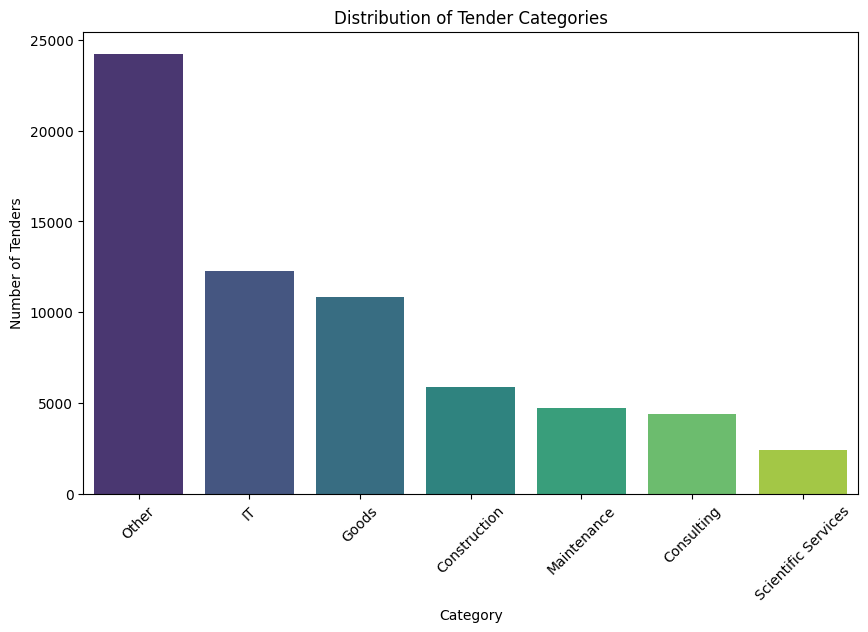

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette='viridis')
plt.title('Distribution of Tender Categories')
plt.xlabel('Category')
plt.ylabel('Number of Tenders')
plt.xticks(rotation=45)
plt.show()

In [17]:
avg_contract_value = df_canada.groupby('Category')['contract_value'].mean().sort_values(ascending=False)
print("\nAverage Contract Value by Category:")
print(avg_contract_value)


Average Contract Value by Category:
Category
Construction           3.744980e+06
Consulting             3.320938e+06
Other                  6.248694e+05
IT                     2.428971e+05
Maintenance            2.171491e+05
Goods                  1.367233e+05
Scientific Services    1.199223e+05
Name: contract_value, dtype: float64


<ipython-input-18-4a148c863b05>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_contract_value.index, y=avg_contract_value.values, palette='viridis')


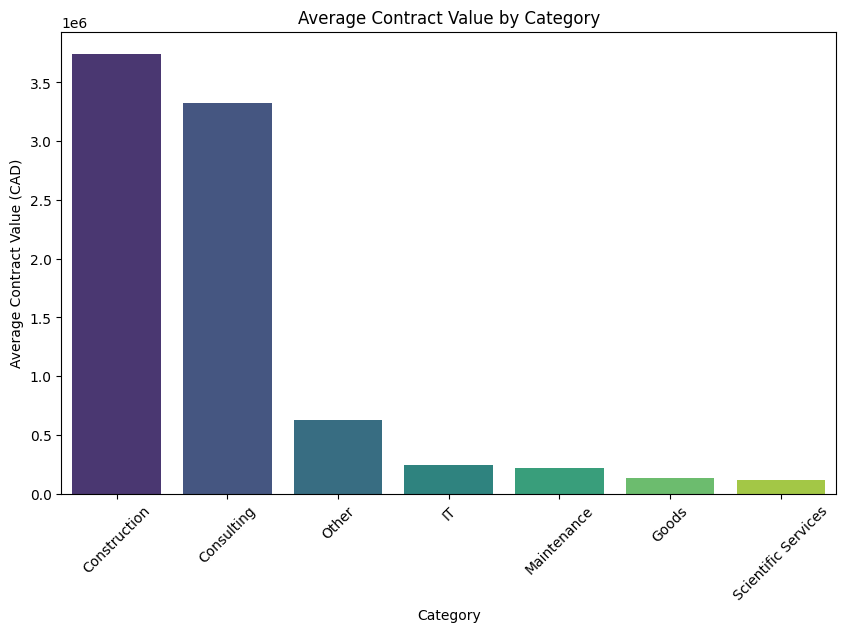

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_contract_value.index, y=avg_contract_value.values, palette='viridis')
plt.title('Average Contract Value by Category')
plt.xlabel('Category')
plt.ylabel('Average Contract Value (CAD)')
plt.xticks(rotation=45)
plt.show()

In [19]:
print("\nInsights for Competitive Bidding:")
print("1. The most common categories are:", category_distribution.index.tolist()[:3])
print("2. The categories with the highest average contract values are:", avg_contract_value.index.tolist()[:3])


Insights for Competitive Bidding:
1. The most common categories are: ['Other', 'IT', 'Goods']
2. The categories with the highest average contract values are: ['Construction', 'Consulting', 'Other']


In [20]:
df_canada.to_csv('categorized_tender_data.csv', index=False)
